<a href="https://colab.research.google.com/github/kay1-cmd/ai101-workspace/blob/main/L_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import pandas

In [ ]:
import pandas as pd

read dataset and start to explore variables  

Per capita :
There are 14 attributes in each case of the dataset. They are:
* CRIM - per capita crime rate by town

* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
data = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv")
data.head()

,rownames,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


summary statistics for numerical columns in a Pandas DataFrame

In [ ]:
data.describe()

,rownames,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Find the finds the correlation of each column in a DataFrame if any

In [ ]:
data[['crim','age','tax','medv']].corr()

,crim,age,tax,medv
crim,1.000000,0.352734,0.582764,-0.388305
age,0.352734,1.000000,0.506456,-0.376955
tax,0.582764,0.506456,1.000000,-0.468536
medv,-0.388305,-0.376955,-0.468536,1.000000


In [ ]:
#clean up data and prep for linear regression

data = data.iloc[:, 1:] #delete first column

y = data['medv'] # median value of homes
X = data.loc[:, data.columns != 'medv']



print(y[0:5])
X.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

R-squared is possibly the most important measurement produced by this summary. R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. In percentage terms, 0.748 would mean our model explains .74% of the change in our ‘Lottery’ variable. Adjusted R-squared is important for analyzing multiple dependent variables’ efficacy on the model.

In [ ]:
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_new ).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     83.38
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          1.15e-100
Time:                        18:14:07   Log-Likelihood:                -1126.4
No. Observations:                 379   AIC:                             2281.
Df Residuals:                     365   BIC:                             2336.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8364      5.861      5.090      0.000      18.310      41.363
crim          -0.1283      0.039     -3.262      0.001      -0.206      -0.051
zn             0.0296      0.017      1.772      0.077      -0.003       0.062
indus          0.0489      0.069      0.706      0.481      -0.087       0.185
chas           2.7735      0.974      2.848      0.005       0.859       4.688
nox          -16.2388      4.432     -3.664      0.000     -24.955      -7.523
rm             4.3688      0.481      9.091      0.000       3.424       5.314
age           -0.0092      0.015     -0.599      0.550      -0.040       0.021
dis           -1.4009      0.237     -5.915      0.000      -1.867      -0.935
rad            0.2578      0.079      3.279      0.001       0.103       0.412
tax           -0.0100      0.004     -2.277      0.023      -0.019      -0.001
ptratio       -0.9231      0.150     -6.164      0.000      -1.218      -0.629
black          0.0132      0.003      4.143      0.000       0.007       0.019
lstat         -0.5176      0.058     -8.995      0.000      -0.631      -0.404
==============================================================================
Omnibus:                      125.754   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              529.968
Skew:                           1.392   Prob(JB):                    8.30e-116
Kurtosis:                       8.081   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

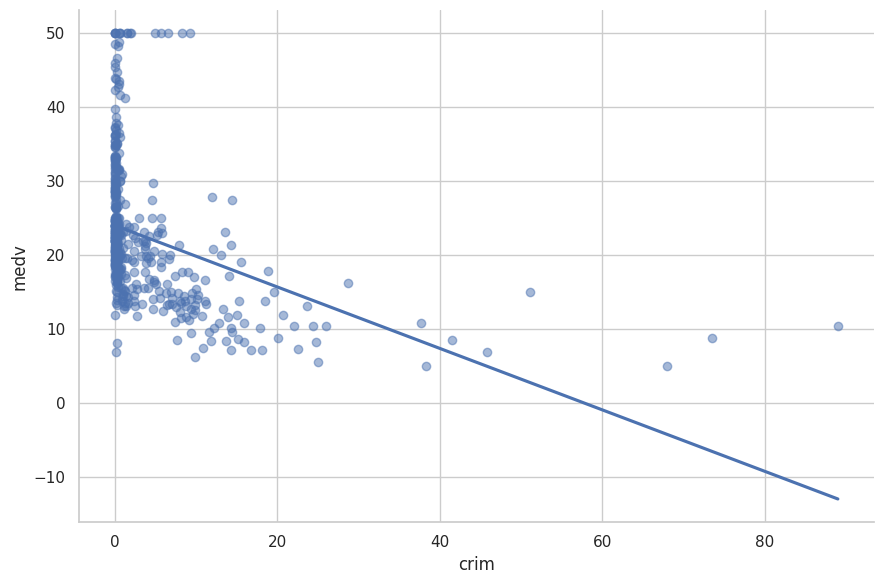

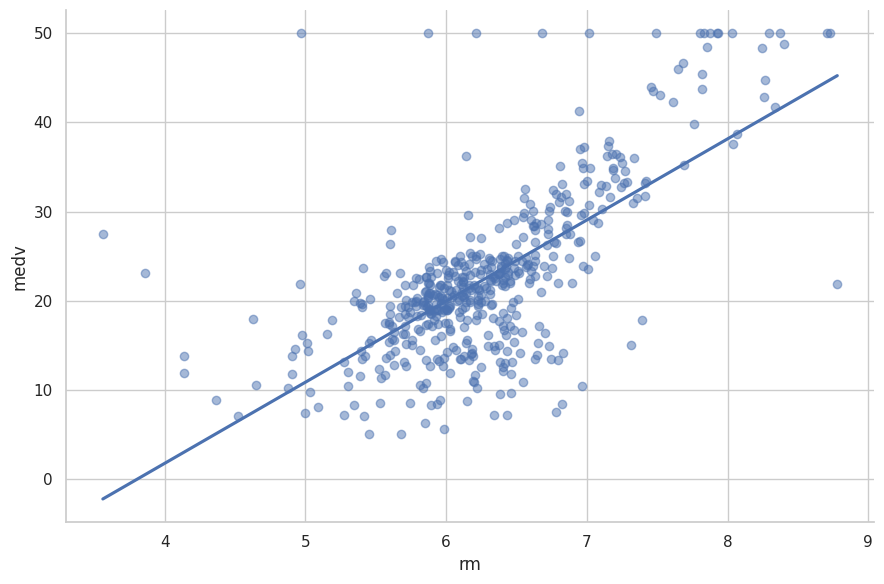

In [ ]:
import seaborn as sns

# Plot the regression results
sns.set(style="whitegrid")
sns.lmplot(x ="crim", y="medv", data=data, ci=None, height=6, aspect=1.5, scatter_kws={'alpha': 0.5})
sns.lmplot(x ="rm", y="medv", data=data, ci=None, height=6, aspect=1.5, scatter_kws={'alpha': 0.5})
